In [304]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

X_train = pd.read_csv('./data/nba/X_train.csv')
y_train = pd.read_csv('./data/nba/y_train.csv')
X_test = pd.read_csv('./data/nba/X_test.csv')

X_train, X_test, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

print(X_train.shape)
print(y_train.shape)
#print(X_train.columns[0])
#print(X_train.columns[1])
print(X_train.columns)
print(y_train.columns)

print(X_train[:4])
print(y_train[:4])

(36679, 8)
(36679, 1)
Index(['PERIOD', 'GAME_CLOCK', 'SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME',
       'SHOT_DIST', 'PTS_TYPE', 'CLOSE_DEF_DIST'],
      dtype='object')
Index(['FGM'], dtype='object')
       PERIOD  GAME_CLOCK  SHOT_CLOCK  DRIBBLES  TOUCH_TIME  SHOT_DIST  \
3721        1         583        14.5        11         9.7        5.7   
49322       3         520        13.7         0         0.9       20.0   
51102       4         290         8.0         1         2.5       23.6   
24990       3         572        10.7         1         1.5        9.5   

       PTS_TYPE  CLOSE_DEF_DIST  
3721          2             5.0  
49322         2             5.1  
51102         3             4.8  
24990         2             2.2  
       FGM
3721     1
49322    1
51102    0
24990    0


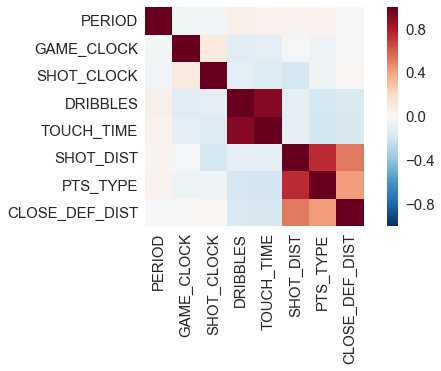

In [305]:
# inline plotting instead of popping out
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.5)

ticklabels = [s for s in X_train.columns]

hm = sns.heatmap(R,
            cbar=True,
            square=True,
            yticklabels=ticklabels,
            xticklabels=ticklabels)

plt.tight_layout()
plt.savefig('./output/lab05-fig-data-corr.png', dpi=300)
plt.show()

sns.reset_orig()

In [306]:
from sklearn.ensemble import RandomForestClassifier
# a more convenient way to evaluate a trained model is to use the sklearn.metrics 
from sklearn.metrics import accuracy_score

# criterion : impurity function
# n_estimators :  number of decision trees
# random_state : seed used by the random number generator
# n_jobs : number of cores for parallelism
forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=200, 
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train, y_train.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=2,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

 1) GAME_CLOCK                     0.200453
 2) SHOT_DIST                      0.200179
 3) SHOT_CLOCK                     0.177025
 4) CLOSE_DEF_DIST                 0.173898
 5) TOUCH_TIME                     0.140622
 6) PERIOD                         0.052434
 7) DRIBBLES                       0.048234
 8) PTS_TYPE                       0.007156


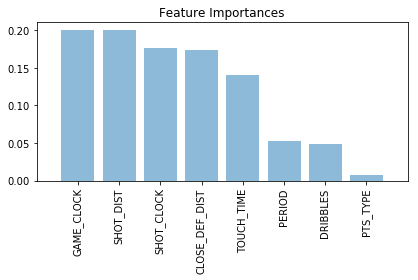

In [307]:
# inline plotting instead of popping out
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

importances = forest.feature_importances_
# get sort indices in descending order
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            X_train.columns.values[indices[f]], 
                            importances[indices[f]]))

plt.figure()
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]),
        importances[indices],
        align='center',
        alpha=0.5)

plt.xticks(range(X_train.shape[1]), 
           X_train.columns.values[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.savefig('./output/lab05-fig-forest-feature-importances.png', dpi=300)
plt.show()

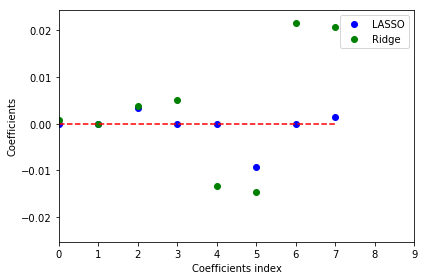

Selected attributes: Index(['GAME_CLOCK', 'SHOT_CLOCK', 'SHOT_DIST', 'CLOSE_DEF_DIST'], dtype='object')


In [308]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

var_num = X_train.shape[1]

lr_lasso = Lasso(alpha=0.1)
lr_lasso.fit(X_train, y_train)
lr_ridge = Ridge(alpha=0.1)
lr_ridge.fit(X_train, y_train)

plt.scatter(range(var_num), lr_lasso.coef_, label='LASSO', color='blue')
plt.scatter(range(var_num), lr_ridge.coef_, label='Ridge', color='green')
plt.hlines(y=0, xmin=0, xmax=var_num - 1, color='red', linestyle='--')
plt.xlim(0, 9)
plt.legend(loc='upper right')
plt.xlabel('Coefficients index')
plt.ylabel('Coefficients')
plt.tight_layout()
plt.show()

epsilon = 1e-5
idxs = np.where(abs(lr_lasso.coef_) > epsilon)
print('Selected attributes: {}'.format(X_train.columns[idxs]))

In [309]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(forest, threshold=0.177)
# calls forest.fit()
sfm.fit(X_train, y_train)
X_train_alt = sfm.transform(X_train)
X_test_alt = sfm.transform(X_test)

for f in range(X_alt.shape[1]): #mdf
    print("%2d) %-*s %f" % (f + 1, 30, 
                            X_train.columns.values[indices[f]], 
                            importances[indices[f]]))

/Users/mosquito/anaconda/lib/python3.6/site-packages/sklearn/feature_selection/from_model.py:169: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


 1) GAME_CLOCK                     0.200453
 2) SHOT_DIST                      0.200179
 3) SHOT_CLOCK                     0.177025


In [310]:
# Random Forests
forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=200, 
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train_alt, y_train.values.ravel())

y_pred_rdforest = forest.predict(X_test_alt)
print('Accuracy (rdforest): %.2f' % accuracy_score(y_valid, y_pred_rdforest))

Accuracy (rdforest): 0.56


In [311]:
from sklearn.tree import DecisionTreeClassifier

# criterion : impurity function
# max_depth : maximum depth of tree
# random_state : seed of random number generator
tree = DecisionTreeClassifier(criterion='entropy', 
                              max_depth=3, 
                              random_state=0)
tree.fit(X_train_alt, y_train.values.ravel())

# Decision Tree
y_pred_dctree = tree.predict(X_test_alt)
print('Accuracy (dctree): %.2f' % accuracy_score(y_valid, y_pred_dctree))

Accuracy (dctree): 0.61


In [312]:
# Perceptron via Scikit-learn
from sklearn.linear_model import Perceptron

sc = StandardScaler()
sc.fit(X_train_alt)
X_train_std = sc.transform(X_train_alt)
X_test_std = sc.transform(X_test_alt)

ppn = Perceptron(max_iter=10, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)

y_pred_ppn = ppn.predict(X_test_std)
print('Accuracy (perceptron): %.2f' % accuracy_score(y_valid, y_pred_ppn))

Accuracy (perceptron): 0.57


/Users/mosquito/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [313]:
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.
    random_state : int
        The seed of the pseudo random number generator.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.activation(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return self.net_input(X)

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(X) >= 0.0, 1, -1)


In [314]:
from numpy.random import seed

class AdalineSGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.
    shuffle : bool (default: True)
        Shuffles training data every epoch if True to prevent cycles.
    random_state : int
        Set random state for shuffling and initializing the weights.
        
    """
    def __init__(self, eta=0.01, n_iter=50, shuffle=True, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        if random_state:
            seed(random_state)
        
    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self

    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = np.random.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """Randomly initialize weights"""
        self.w_ = np.random.normal(loc=0.0, scale=0.01, size=1 + m)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.activation(xi)
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return self.net_input(X)

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(X) >= 0.0, 1, -1)

    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

In [315]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

sc = StandardScaler()
sc.fit(X_train_alt)
ada_train_std = sc.transform(X_train_alt)
ada_test_std = sc.transform(X_test_alt)

ada = AdalineGD(n_iter=20, eta=0.001)
ada.fit(ada_train_std, y_train.values.ravel())

adas = AdalineSGD(n_iter=20, eta=0.001, random_state=1)
adas.fit(ada_train_std, y_train.values.ravel())

y_pred_ada = ada.predict(ada_test_std)
print('Accuracy (ada): %.2f' % accuracy_score(y_valid, y_pred_ada))

y_pred_adas = adas.predict(ada_test_std)
print('Accuracy (adas): %.2f' % accuracy_score(y_valid, y_pred_adas))

Accuracy (ada): 0.18
Accuracy (adas): 0.46


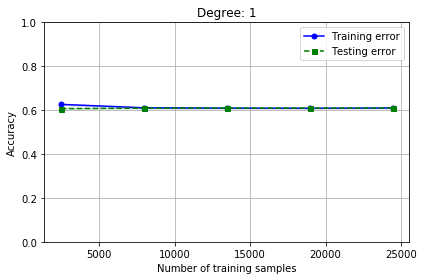

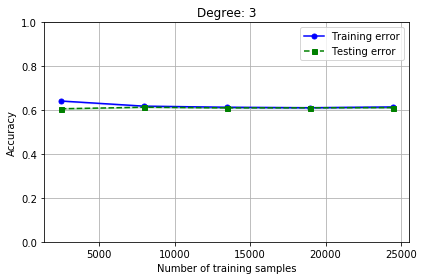

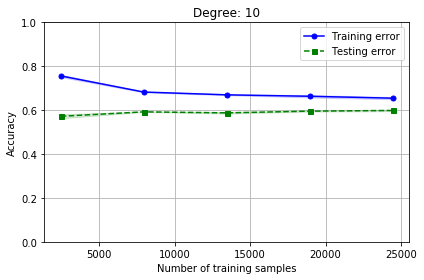

In [316]:
from sklearn.learning_curve import learning_curve
from sklearn.preprocessing import PolynomialFeatures

degree = [1, 3, 10]

for d in degree:
  tree = DecisionTreeClassifier(criterion='entropy', 
                              max_depth=d,
                              random_state=0)
  tree.fit(X_train_alt, y_train.values.ravel())
 
  train_sizes, train_scores, test_scores = learning_curve(
      estimator=tree, X=X_train, y=y_train.values.ravel(), scoring='accuracy')

  train_mean = np.mean(train_scores, axis=1)
  train_std = np.std(train_scores, axis=1)
  test_mean = np.mean(test_scores, axis=1)
  test_std = np.std(test_scores, axis=1)

  plt.plot(
      train_sizes,
      train_mean,
      color='blue',
      marker='o',
      markersize=5,
      label='Training error')
  plt.fill_between(
      train_sizes,
      train_mean + train_std,
      train_mean - train_std,
      alpha=0.15,
      color='blue')

  plt.plot(
      train_sizes,
      test_mean,
      color='green',
      linestyle='--',
      marker='s',
      markersize=5,
      label='Testing error')
  plt.fill_between(
      train_sizes,
      test_mean + test_std,
      test_mean - test_std,
      alpha=0.15,
      color='green')

  plt.title('Degree: %d' % d)
  plt.grid()
  plt.xlabel('Number of training samples')
  plt.ylabel('Accuracy')
  plt.legend(loc='upper right')
  plt.ylim([0, 1])
  plt.tight_layout()
  plt.savefig('./output/lab05-fig-learning-curve-%d.png' % d, dpi=300)
  plt.show()

X_test.to_csv('./output/y_pred.csv')

In [317]:
# Deep Learning Lab05 Report
First, I plot the correlation matrix to quantify the relationship between all the features.
Then, I use both random forest and LASSO to calculate the feature importance. 
I found that the top-3 features are 1) GAME_CLOCK, 2) SHOT_DIST, and  3) SHOT_CLOCK sequentially. 
Using these top-3 features to evaluate all the models I have tried, including Decision Tree, Random Forest, Perceptron, AdalineGD, and AdalineSGD. 
I found that the accuracy of Decision Tree is highest (around 0.6=60%). 
This is why I choose Decision Tree to plot the learning curve and it is not over-fit.
In the end, I output all the figures I draw in this assignment and the the y_pred.csv file.

SyntaxError: invalid syntax (<ipython-input-317-ec0f5dfd8918>, line 2)